In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
from sentence_transformers import SentenceTransformer
from sklearn import metrics
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from transformers import AutoTokenizer, AutoModel
import torch

In [16]:
def plot_confusion_matrix(matrix):
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(matrix.shape[0])
    plt.xticks(tick_marks, range(matrix.shape[0]), rotation=45)
    plt.yticks(tick_marks, range(matrix.shape[0]))

    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [11]:
c1 = """n = 10
num1 = 0
num2 = 1
next_number = num2
count = 1

while count <= n:
    print(next_number, end=" ")
    count += 1
    num1, num2 = num2, next_number
    next_number = num1 + num2
print()"""

c2 = """a = "Hello, World!"
print(a.upper())"""


c3 = """Be with those who help your being."""
c4 = """Let the beauty of what you love be what you do."""
c5 = """The garden of the world has no limits, except in your mind."""


c6 = """Today was a productive day; I managed to finish two important tasks and made significant progress on my project."""
c7 = """I had a wonderful time with my friends at the park today; we played games, shared stories, and enjoyed the beautiful weather."""
c8 = """I felt overwhelmed and stressed today due to a heavy workload and tight deadlines; I need to find ways to manage my time better."""

c9 = """I'm trying to build a Job Role Recommendation System wherein a Clustering algorithm groups together Unlabeled resumes on the basis of their 'Skills'. The best result I've had so far was using BERT transformer embedding + KMeans, where I had also used PCA to reduce some dimension. But, the results haven't been accurate enough much.

Anyone else knows about any other word embedding technique I can use that fits well for Clustering algorithms? Or any other approach I can use to build the recommendation system?

Thanks."""

# all-MiniLM-L6-v2

In [10]:
model1 = SentenceTransformer("all-MiniLM-L6-v2")

In [12]:
sentences = [c4,c7,c3,c8,c5,c6,c1,c2,c9]
dd = ['b','c','b','c','b','c','a','a','d']

In [13]:
embeddings1 = model1.encode(sentences)
print(embeddings1.shape)

(9, 384)


In [15]:
similarities1 = model1.similarity(embeddings1, embeddings1)
print(similarities1.shape)

torch.Size([9, 9])


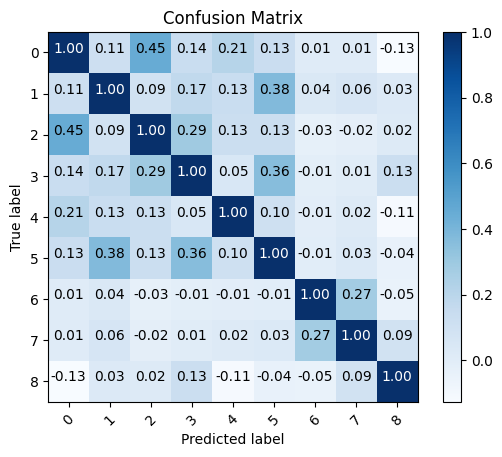

In [17]:
plot_confusion_matrix(similarities1)


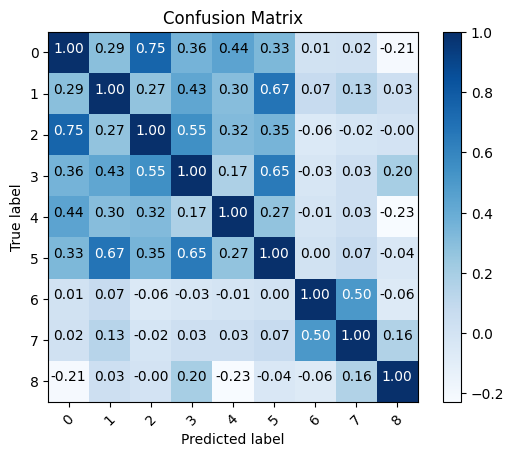

In [20]:
plot_confusion_matrix(metrics.pairwise.cosine_similarity(similarities1))

In [ ]:
dd = ["b", "c", "b", "c", "b", "c", "a", "a", "d"]
jj = [0, 1, 2, 3, 4, 5, 6, 7, 8]

In [32]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(similarities1)

# Step 4: Evaluate the clusters
for i, sentence in enumerate(sentences):
    print(f"Cluster: {clusters[i]},ans:{dd[i]}")

Cluster: 2,ans:b
Cluster: 0,ans:c
Cluster: 2,ans:b
Cluster: 0,ans:c
Cluster: 2,ans:b
Cluster: 0,ans:c
Cluster: 1,ans:a
Cluster: 1,ans:a
Cluster: 3,ans:d


# bert-base-uncased

In [22]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
inputs = tokenizer(sentences, return_tensors="pt", padding=True, truncation=True)

# Step 2: Generate sentence embeddings
model2 = AutoModel.from_pretrained("bert-base-uncased")
with torch.no_grad():
    outputs = model2(**inputs)
    sentence_embeddings = outputs.last_hidden_state[:, 0, :].numpy()

In [23]:
sentence_embeddings.shape

(9, 768)

In [26]:
similarities2 = model1.similarity(sentence_embeddings, sentence_embeddings)

In [27]:
similarities2.shape

torch.Size([9, 9])

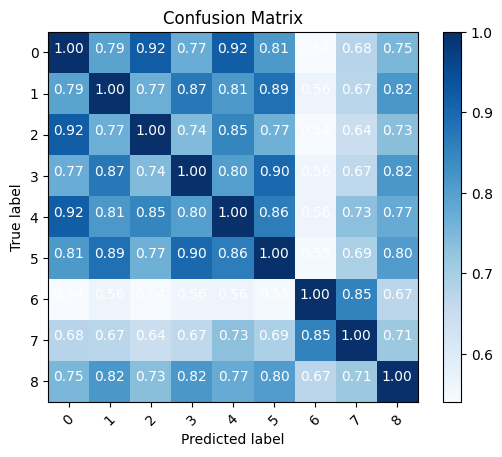

In [28]:
plot_confusion_matrix(similarities2)

In [29]:
dd = ["b", "c", "b", "c", "b", "c", "a", "a", "d"]
jj = [0, 1, 2, 3, 4, 5, 6, 7, 8]

In [31]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(sentence_embeddings)

# Step 4: Evaluate the clusters
for i, sentence in enumerate(sentences):
    print(f"Cluster: {clusters[i]},ans:{dd[i]}")

Cluster: 2,ans:b
Cluster: 0,ans:c
Cluster: 2,ans:b
Cluster: 0,ans:c
Cluster: 2,ans:b
Cluster: 0,ans:c
Cluster: 1,ans:a
Cluster: 1,ans:a
Cluster: 3,ans:d


# all-mpnet-base-v2

In [33]:
model3 = SentenceTransformer("all-mpnet-base-v2")

In [34]:
embeddings3 = model3.encode(sentences)
print(embeddings3.shape)

(9, 768)


In [35]:
similarities3 = model3.similarity(embeddings3, embeddings3)

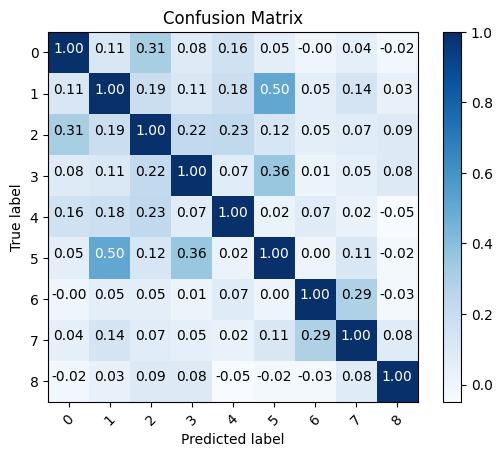

In [36]:
plot_confusion_matrix(similarities3)

In [37]:
dd = ['b','c','b','c','b','c','a','a','d']
jj = [ 0   ,1   ,2  , 3  , 4  , 5  , 6 ,  7 ,  8]

In [38]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings3)

# Step 4: Evaluate the clusters
for i, sentence in enumerate(sentences):
    print(f"Cluster: {clusters[i]},ans:{dd[i]}")

Cluster: 2,ans:b
Cluster: 3,ans:c
Cluster: 2,ans:b
Cluster: 0,ans:c
Cluster: 2,ans:b
Cluster: 3,ans:c
Cluster: 1,ans:a
Cluster: 1,ans:a
Cluster: 0,ans:d
